In [2]:
import os
import numpy as np
import pickle as pkl
from os.path import join as pjoin
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_PCA')
if not os.path.isdir(work_dir):
    os.makedirs(work_dir)

In [3]:
def plot_explained_var(pca_file, figsize=None, out_file=None):
    plt.figure(figsize=figsize)
    pca = pkl.load(open(pca_file, 'rb'))
    x = np.arange(pca.n_components)
    xticklabels = [f'C{i}' for i in range(1, pca.n_components+1)]
    plt.plot(x, pca.explained_variance_ratio_)
    plt.xticks(x, xticklabels)
    plt.title(os.path.basename(pca_file))
    plt.xlabel('component')
    plt.ylabel('explained_variance_ratio')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

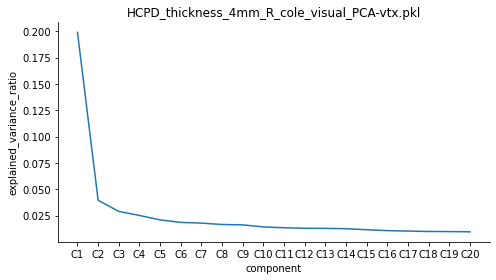

In [3]:
plot_explained_var(
    pca_file=pjoin(anal_dir, 'structure/HCPD_thickness_4mm_R_cole_visual_PCA-vtx.pkl'),
    figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_PCA-vtx_explained_var.jpg')
)

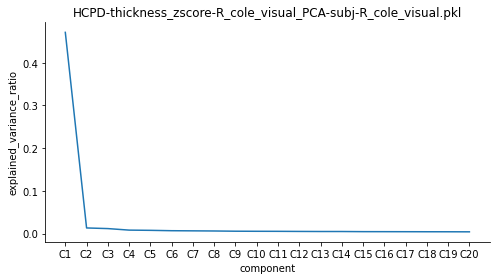

In [7]:
plot_explained_var(
    pca_file=pjoin(anal_dir, 'structure/HCPD-thickness_zscore-R_cole_visual_PCA-subj-R_cole_visual.pkl'),
    figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPD-thickness_zscore-R_cole_visual_PCA-subj-R_cole_visual.jpg')
)